In [1]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense  
import pandas as pd

In [2]:
dataTrain=pd.read_csv("../data/newtrain.csv")
dataTest=pd.read_csv("../data/newtest.csv")
# print(dataTrain.head())
# print(dataTrain.shape)
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1806 non-null   int64  
 1   round          1806 non-null   int64  
 2   venue          1806 non-null   int64  
 3   gf             1806 non-null   float64
 4   ga             1806 non-null   float64
 5   xg             1806 non-null   float64
 6   xga            1806 non-null   float64
 7   poss           1806 non-null   float64
 8   formation      1806 non-null   int64  
 9   sh             1806 non-null   float64
 10  sot            1806 non-null   float64
 11  dist           1806 non-null   float64
 12  fk             1806 non-null   float64
 13  pk             1806 non-null   float64
 14  pkatt          1806 non-null   float64
 15  venue_code     1806 non-null   int64  
 16  opp_code       1806 non-null   int64  
 17  hour           1806 non-null   int64  
 18  day_code

In [3]:
del dataTrain["Unnamed: 0"]
del dataTest["Unnamed: 0"]
del dataTrain["target_away"]
del dataTest["target_away"]

del dataTrain["gf_rolling"]
del dataTest["gf_rolling"]

del dataTrain["ga_rolling"]
del dataTest["ga_rolling"]

del dataTrain["sh_rolling"]
del dataTest["sh_rolling"]

del dataTrain["sot_rolling"]
del dataTest["sot_rolling"]

del dataTrain["dist_rolling"]
del dataTest["dist_rolling"]

del dataTrain["fk_rolling"]
del dataTest["fk_rolling"]

In [4]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   round          1806 non-null   int64  
 1   venue          1806 non-null   int64  
 2   gf             1806 non-null   float64
 3   ga             1806 non-null   float64
 4   xg             1806 non-null   float64
 5   xga            1806 non-null   float64
 6   poss           1806 non-null   float64
 7   formation      1806 non-null   int64  
 8   sh             1806 non-null   float64
 9   sot            1806 non-null   float64
 10  dist           1806 non-null   float64
 11  fk             1806 non-null   float64
 12  pk             1806 non-null   float64
 13  pkatt          1806 non-null   float64
 14  venue_code     1806 non-null   int64  
 15  opp_code       1806 non-null   int64  
 16  hour           1806 non-null   int64  
 17  day_code       1806 non-null   int64  
 18  pk_rolli

In [4]:
# Data Training
train_data = dataTrain.iloc[:, :-1].values
train_labels = dataTrain.iloc[:, -1:].values

# Data Testing
test_data = dataTest.iloc[:, :-1].values
test_labels = dataTest.iloc[:, -1:].values

In [7]:
train_data

array([[33.,  0.,  0., ...,  0.,  0.,  0.],
       [35.,  1.,  2., ...,  0.,  0.,  0.],
       [37.,  0.,  5., ...,  0.,  0.,  0.],
       ...,
       [29.,  0.,  0., ...,  0.,  0., 19.],
       [30.,  0.,  0., ...,  0.,  0., 19.],
       [31.,  1.,  1., ...,  0.,  0., 19.]])

In [5]:
# Normalisasi Data
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Pembentukan Data Sequence
sequence_length = 1  # Panjang sequence yang akan digunakan
num_features = train_data.shape[1]

In [6]:
print(train_data[:1])

[[0.89189189 0.         0.         0.         0.27659574 0.16666667
  0.484375   0.2        0.28571429 0.14285714 0.39862543 0.
  0.         0.         0.         0.26315789 0.125      1.
  0.         0.         0.        ]]


In [7]:
def create_sequences(data, labels, sequence_length):
    X = []
    y = []
    for i in range(len(data) - sequence_length + 1):
        X.append(data[i:i+sequence_length])
        y.append(labels[i+sequence_length-1])
    return np.array(X), np.array(y)

In [8]:
X_train, y_train = create_sequences(train_data, train_labels, sequence_length)
X_test, y_test = create_sequences(test_data, test_labels, sequence_length)

In [9]:
# Reshape input data
X_train = X_train.reshape(-1, sequence_length, num_features)
X_test = X_test.reshape(-1, sequence_length, num_features)

In [11]:
print(X_train[1], y_train[1])

[[35.          1.          2.          0.          2.4         0.4
  64.          4.         25.          8.         18.4         2.
   0.          0.          1.          4.         12.          6.
   1.          1.33333333 12.          3.66666667 16.56666667  0.33333333
   0.          0.          0.        ]] [1]


In [10]:
for i in range(len(X_train)):
    print(X_train[i], y_train[i])

[[33.   0.   0.   0.   1.4  0.8 49.   4.  11.   2.  17.5  0.   0.   0.
   0.   5.  13.   6.   0.   0.   0. ]] [0]
[[35.   1.   2.   0.   2.4  0.4 64.   4.  25.   8.  18.4  2.   0.   0.
   1.   4.  12.   6.   0.   0.   0. ]] [1]
[[37.   0.   5.   2.   3.5  1.  67.   4.  30.  14.  16.6  2.   0.   0.
   0.   7.  13.   6.   0.   0.   0. ]] [1]
[[ 2.   0.   1.   3.   0.3  1.8 43.   4.   6.   3.  20.5  1.   0.   0.
   0.  12.  14.   6.   0.   0.   0. ]] [0]
[[ 3.   1.   2.   0.   2.1  0.7 43.   4.  14.   5.  16.4  1.   0.   0.
   1.  17.  12.   5.   0.   0.   0. ]] [1]
[[ 6.   1.   1.   3.   4.7  1.8 75.   4.  33.  14.  16.7  2.   0.   0.
   1.  13.  17.   5.   0.   0.   0. ]] [0]
[[ 7.   0.   1.   1.   0.7  1.3 67.   4.  11.   6.  20.6  1.   0.   0.
   0.  16.  12.   6.   0.   0.   0. ]] [0]
[[ 8.   0.   0.   0.   1.   0.4 69.  15.  22.   3.  21.5  2.   0.   0.
   0.  18.  20.   2.   0.   0.   0. ]] [0]
[[ 9.   1.   1.   0.   1.8  0.3 71.  15.  23.   5.  17.4  0.   0.   0.
   1.  14.  15.  

In [11]:
print(len(X_train), len(y_train))

1806 1806


In [10]:
# Pembangunan Model LSTM
model = Sequential()
model.add(LSTM(units=64, input_shape=(sequence_length, num_features)))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'], run_eagerly=True)

In [11]:
# Pelatihan Model
model.fit(X_train, y_train, epochs=10, batch_size=22)  # Sesuaikan dengan jumlah epoch dan ukuran batch yang optimal

Epoch 1/10
83/83 [==============================] - 3s 34ms/step - loss: 0.6604 - accuracy: 0.6024
Epoch 2/10
83/83 [==============================] - 3s 32ms/step - loss: 0.5866 - accuracy: 0.6938
Epoch 3/10
83/83 [==============================] - 3s 32ms/step - loss: 0.4752 - accuracy: 0.7896
Epoch 4/10
83/83 [==============================] - 3s 32ms/step - loss: 0.3791 - accuracy: 0.8533
Epoch 5/10
83/83 [==============================] - 3s 33ms/step - loss: 0.3126 - accuracy: 0.8843
Epoch 6/10
83/83 [==============================] - 3s 33ms/step - loss: 0.2613 - accuracy: 0.9086
Epoch 7/10
83/83 [==============================] - 3s 32ms/step - loss: 0.2210 - accuracy: 0.9308
Epoch 8/10
83/83 [==============================] - 3s 32ms/step - loss: 0.1863 - accuracy: 0.9502
Epoch 9/10
83/83 [==============================] - 3s 31ms/step - loss: 0.1600 - accuracy: 0.9612
Epoch 10/10
83/83 [==============================] - 3s 32ms/step - loss: 0.1361 - accuracy: 0.9740


In [16]:
for i in range(len(X_test)):
    print(X_test[i], y_test[i])

[[ 0.          0.          2.          0.          1.          1.2
  44.         15.         10.          2.         14.6         1.
   0.          0.          0.          6.         20.          4.
   1.66666667  2.         15.          5.         20.7         0.
   0.33333333  0.33333333  0.        ]] [1]
[[11.          1.          4.          2.          2.7         0.5
  50.         15.         19.          7.         13.          0.
   0.          0.          1.         10.         15.          5.
   2.33333333  1.         15.33333333  4.         17.56666667  0.33333333
   0.33333333  0.33333333  0.        ]] [1]
[[22.          0.          3.          0.          1.3         0.3
  57.         15.         14.          6.         14.8         0.
   0.          0.          0.          2.         17.          5.
   3.66666667  1.         18.          5.66666667 14.86666667  0.33333333
   0.33333333  0.33333333  0.        ]] [1]
[[32.          1.          2.          1.          2.6   

In [17]:
print(len(X_test), len(y_test))

609 609


In [12]:
# Testing Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")

20/20 [==============================] - 0s 20ms/step - loss: 0.1332 - accuracy: 0.9869
Loss: 0.1332
Accuracy: 0.9869


Epoch 1/10
83/83 [==============================] - 4s 43ms/step - loss: 0.1185 - accuracy: 0.9823 - val_loss: 0.1176 - val_accuracy: 0.9869
Epoch 2/10
83/83 [==============================] - 3s 39ms/step - loss: 0.1017 - accuracy: 0.9889 - val_loss: 0.1003 - val_accuracy: 0.9967
Epoch 3/10
83/83 [==============================] - 3s 41ms/step - loss: 0.0900 - accuracy: 0.9934 - val_loss: 0.0888 - val_accuracy: 1.0000
Epoch 4/10
83/83 [==============================] - 3s 41ms/step - loss: 0.0778 - accuracy: 0.9967 - val_loss: 0.0756 - val_accuracy: 1.0000
Epoch 5/10
83/83 [==============================] - 3s 39ms/step - loss: 0.0682 - accuracy: 0.9967 - val_loss: 0.0671 - val_accuracy: 1.0000
Epoch 6/10
83/83 [==============================] - 3s 39ms/step - loss: 0.0598 - accuracy: 0.9994 - val_loss: 0.0612 - val_accuracy: 1.0000
Epoch 7/10
83/83 [==============================] - 3s 39ms/step - loss: 0.0531 - accuracy: 1.0000 - val_loss: 0.0519 - val_accuracy: 1.0000
Epoch 8/10
83

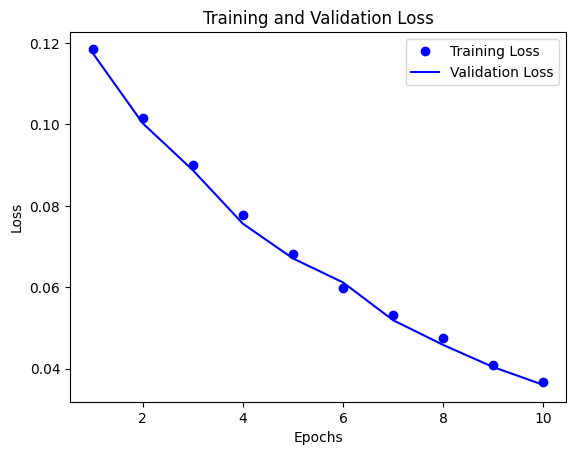

In [14]:
import matplotlib.pyplot as plt

# Membuat plot untuk memeriksa overfitting
def plot_loss(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(train_loss) + 1)

    plt.plot(epochs, train_loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Melatih model dan memeriksa overfitting
history = model.fit(X_train, y_train, epochs=10, batch_size=22, validation_data=(X_test, y_test))

# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")

# Memeriksa overfitting dengan plot loss
plot_loss(history)

In [18]:
new = [0, 0, 2, 0, 1, 1.2, 44, 15, 10, 2, 14.6, 1, 0, 0, 0, 6, 20, 4, 1.666666667, 2, 15, 5, 20.7, 0, 0.3333333333, 0.3333333333, 0]
new = np.array(new)
# new = new.reshape(1, -1)
new

array([ 0.        ,  0.        ,  2.        ,  0.        ,  1.        ,
        1.2       , 44.        , 15.        , 10.        ,  2.        ,
       14.6       ,  1.        ,  0.        ,  0.        ,  0.        ,
        6.        , 20.        ,  4.        ,  1.66666667,  2.        ,
       15.        ,  5.        , 20.7       ,  0.        ,  0.33333333,
        0.33333333,  0.        ])

In [19]:
new = new.reshape((1, 1, 27))
new

array([[[ 0.        ,  0.        ,  2.        ,  0.        ,
          1.        ,  1.2       , 44.        , 15.        ,
         10.        ,  2.        , 14.6       ,  1.        ,
          0.        ,  0.        ,  0.        ,  6.        ,
         20.        ,  4.        ,  1.66666667,  2.        ,
         15.        ,  5.        , 20.7       ,  0.        ,
          0.33333333,  0.33333333,  0.        ]]])

In [20]:
predictNextNumber = model.predict(new)
print(predictNextNumber)

1/1 [==============================] - 0s 38ms/step
[[0.9411009]]


In [21]:
baru = [1, 35, 1, 2, 0, 2.4, 0.4, 64, 4, 25, 8, 18.4, 2, 0, 0, 1, 4, 12, 6, 1, 1.333333333, 12, 3.666666667, 16.56666667, 0.3333333333, 0, 0]
baru = np.array(baru)
baru = baru.reshape(1, -1)
baru

array([[ 1.        , 35.        ,  1.        ,  2.        ,  0.        ,
         2.4       ,  0.4       , 64.        ,  4.        , 25.        ,
         8.        , 18.4       ,  2.        ,  0.        ,  0.        ,
         1.        ,  4.        , 12.        ,  6.        ,  1.        ,
         1.33333333, 12.        ,  3.66666667, 16.56666667,  0.33333333,
         0.        ,  0.        ]])

In [22]:
baru= baru.reshape((1, 1, 27))
baru


array([[[ 1.        , 35.        ,  1.        ,  2.        ,
          0.        ,  2.4       ,  0.4       , 64.        ,
          4.        , 25.        ,  8.        , 18.4       ,
          2.        ,  0.        ,  0.        ,  1.        ,
          4.        , 12.        ,  6.        ,  1.        ,
          1.33333333, 12.        ,  3.66666667, 16.56666667,
          0.33333333,  0.        ,  0.        ]]])

In [23]:
predictbaru = model.predict(baru)
print(predictbaru)

1/1 [==============================] - 0s 39ms/step
[[0.54069406]]


In [24]:
a = [1, 35, 1, 2, 0, 2.4, 0.4, 64, 4, 25, 8, 18.4, 2, 0, 0, 1, 4, 12, 6, 1, 1.333333333, 12, 3.666666667, 16.56666667, 0.3333333333, 0, 0]
a = np.array(a)
a= baru.reshape((1, 1, 27))
a

array([[[ 1.        , 35.        ,  1.        ,  2.        ,
          0.        ,  2.4       ,  0.4       , 64.        ,
          4.        , 25.        ,  8.        , 18.4       ,
          2.        ,  0.        ,  0.        ,  1.        ,
          4.        , 12.        ,  6.        ,  1.        ,
          1.33333333, 12.        ,  3.66666667, 16.56666667,
          0.33333333,  0.        ,  0.        ]]])

In [25]:
predictlagi = model.predict(a)
print(predictlagi)

1/1 [==============================] - 0s 32ms/step
[[0.54069406]]


In [26]:
from sklearn.metrics import classification_report

# Prediksi probabilitas pada data uji
y_pred_prob = model.predict(X_test)

# Konversi probabilitas menjadi label biner (0 atau 1) berdasarkan threshold
threshold = 0.5
y_pred_binary = np.where(y_pred_prob > threshold, 1, 0)

# Peroleh laporan klasifikasi
classification_report = classification_report(y_test, y_pred_binary)

# Tampilkan laporan klasifikasi
print(classification_report)


20/20 [==============================] - 0s 13ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       375
           1       0.99      0.97      0.98       234

    accuracy                           0.98       609
   macro avg       0.98      0.98      0.98       609
weighted avg       0.98      0.98      0.98       609



In [31]:
import pickle

In [32]:
# Simpan model dalam format pkl
pickle.dump(model, open("../model/model.pkl", "wb"))

In [33]:
dataTrain

,round,venue,gf,ga,xg,xga,poss,formation,sh,sot,...,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling,home_code,target_home
0,33,0,0.0,0.0,1.4,0.8,49.0,4,11.0,2.0,...,2.333333,2.333333,17.333333,6.333333,17.300000,0.333333,0.0,0.0,0,0
1,35,1,2.0,0.0,2.4,0.4,64.0,4,25.0,8.0,...,1.000000,1.333333,12.000000,3.666667,16.566667,0.333333,0.0,0.0,0,1
2,37,0,5.0,2.0,3.5,1.0,67.0,4,30.0,14.0,...,1.666667,0.000000,17.666667,6.333333,17.166667,1.000000,0.0,0.0,0,1
3,2,0,1.0,3.0,0.3,1.8,43.0,4,6.0,3.0,...,2.333333,0.666667,22.000000,8.000000,17.500000,1.333333,0.0,0.0,0,0
4,3,1,2.0,0.0,2.1,0.7,43.0,4,14.0,5.0,...,2.666667,1.666667,20.333333,8.333333,18.500000,1.666667,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801,24,0,1.0,0.0,0.5,0.9,50.0,12,7.0,3.0,...,0.666667,1.333333,13.333333,4.000000,16.033333,0.666667,0.0,0.0,19,1
1802,28,1,2.0,1.0,1.1,0.3,61.0,12,16.0,6.0,...,1.000000,1.333333,12.333333,4.333333,15.200000,0.666667,0.0,0.0,19,1
1803,29,0,0.0,2.0,0.9,3.2,38.0,12,15.0,3.0,...,1.666667,1.333333,14.333333,4.666667,17.000000,0.666667,0.0,0.0,19,0
1804,30,0,0.0,1.0,0.3,0.7,59.0,3,9.0,3.0,...,1.000000,1.000000,12.666667,4.000000,17.666667,0.666667,0.0,0.0,19,0


In [34]:
dataTest

,round,venue,gf,ga,xg,xga,poss,formation,sh,sot,...,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling,home_code,target_home
0,0,0,2.0,0.0,1.0,1.2,44.0,15,10.0,2.0,...,1.666667,2.000000,15.000000,5.000000,20.700000,0.000000,0.333333,0.333333,0,1
1,11,1,4.0,2.0,2.7,0.5,50.0,15,19.0,7.0,...,2.333333,1.000000,15.333333,4.000000,17.566667,0.333333,0.333333,0.333333,0,1
2,22,0,3.0,0.0,1.3,0.3,57.0,15,14.0,6.0,...,3.666667,1.000000,18.000000,5.666667,14.866667,0.333333,0.333333,0.333333,0,1
3,32,1,2.0,1.0,2.6,0.8,71.0,15,22.0,8.0,...,3.000000,0.666667,14.333333,5.000000,14.133333,0.333333,0.000000,0.000000,0,1
4,33,1,2.0,1.0,2.4,0.4,59.0,15,22.0,8.0,...,3.000000,1.000000,18.333333,7.000000,14.433333,0.333333,0.000000,0.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,19,0,1.0,2.0,1.1,1.8,57.0,12,7.0,4.0,...,0.666667,1.000000,6.666667,2.666667,16.700000,0.000000,0.000000,0.000000,19,0
605,20,1,2.0,4.0,2.7,1.6,65.0,15,23.0,8.0,...,0.666667,1.333333,6.333333,3.333333,17.166667,0.333333,0.000000,0.000000,19,0
606,21,0,1.0,1.0,0.5,1.3,71.0,12,8.0,1.0,...,1.333333,2.000000,12.666667,5.666667,18.866667,0.666667,0.000000,0.000000,19,0
607,23,1,1.0,0.0,0.6,1.1,38.0,17,9.0,4.0,...,1.333333,2.333333,12.666667,4.333333,17.600000,0.666667,0.000000,0.000000,19,1
